<a href="https://colab.research.google.com/github/Sumitmeharwade/dengAI/blob/main/DengAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
!git clone https://github.com/Sumitmeharwade/dengAI.git

fatal: destination path 'dengAI' already exists and is not an empty directory.


In [123]:
df_f=pd.read_csv('/content/dengAI/DataSets/dengue_features_train.csv')
df_l = pd. read_csv('/content/dengAI/DataSets/dengue_labels_train.csv')

#importing the dataset

In [124]:
df_f.shape

(1456, 24)

In [125]:
df_l.shape

(1456, 4)

In [126]:
df = pd.merge(df_f,df_l,on=('city','weekofyear','year'),how='outer')
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [127]:
pd.concat([df.head(),df.tail()])

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4,4


In [128]:
df.shape

(1456, 25)

In [129]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [131]:
df.isnull().sum()
#check the count of null values in each column

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [132]:
df.duplicated().sum()

0

In [146]:
def dengAIinfo():
  temp=pd.DataFrame(index=df.columns)
  temp["datatype"]=df.dtypes
  temp["not null values"]=df.count()
  temp["null value"]=df.isnull().sum()
  temp["% of the null value"]=df.isnull().mean()*100
  temp["unique count"]=df.nunique()
  return temp
dengAIinfo()
#info on the dataset regarding null values

,datatype,not null values,null value,% of the null value,unique count
city,object,1434,0,0.0,2
year,int64,1434,0,0.0,21
weekofyear,int64,1434,0,0.0,52
week_start_date,object,1434,0,0.0,1029
ndvi_ne,float64,1434,0,0.0,1215
ndvi_nw,float64,1434,0,0.0,1366
ndvi_se,float64,1434,0,0.0,1395
ndvi_sw,float64,1434,0,0.0,1388
precipitation_amt_mm,float64,1434,0,0.0,1146
reanalysis_air_temp_k,float64,1434,0,0.0,1165


In [134]:
df.shape

(1456, 25)

In [135]:
df=df[df['ndvi_se'].notna()]
#removing the rows which have null values of the coloumn 'ndvi_se' , it is observed that null values in many columns have been significantly reduced.
#22 rows have been removed.

In [136]:
df.shape

(1434, 25)

In [137]:
df[(df['ndvi_nw'] <-1) | (df['ndvi_nw']>1)]
#the ndvi values should be between -1 and 1 , no rows have nvdi values <-1 or >1

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases


In [144]:
mean_avg_temp = round(df[~df['reanalysis_avg_temp_k'].isnull()]['reanalysis_avg_temp_k'].mean(),6)
mean_station_avg_temp_c = round(df[~df['station_avg_temp_c'].isnull()]['station_avg_temp_c'].mean(),6)
mean_station_max_temp_c = round(df[~df['station_max_temp_c'].isnull()]['station_max_temp_c'].mean(),6)
mean_station_min_temp_c = round(df[~df['station_min_temp_c'].isnull()]['station_min_temp_c'].mean(),6)
mean_ndvi_ne = round(df[~df['ndvi_ne'].isnull()]['ndvi_ne'].mean(),6)
mean_ndvi_nw = round(df[~df['ndvi_nw'].isnull()]['ndvi_nw'].mean(),6)
mean_reanalysis_air_temp_k = round(df[~df['reanalysis_air_temp_k'].isnull()]['reanalysis_air_temp_k'].mean(),6)
mean_station_diur_temp_rng_c = round(df[~df['station_diur_temp_rng_c'].isnull()]['station_diur_temp_rng_c'].mean(),6)
mean_relative_humidity_percent = round(df[~df['reanalysis_relative_humidity_percent'].isnull()]['reanalysis_relative_humidity_percent'].mean(),6)



median_precip_amt_kg_per_m2 = round(df[~df['reanalysis_precip_amt_kg_per_m2'].isnull()]['reanalysis_precip_amt_kg_per_m2'].median(),6)
median_sat_precip_amt_mm = round(df[~df['reanalysis_sat_precip_amt_mm'].isnull()]['reanalysis_sat_precip_amt_mm'].median(),6)
median_specific_humidity = round(df[~df['reanalysis_specific_humidity_g_per_kg'].isnull()]['reanalysis_specific_humidity_g_per_kg'].median(),6)
median_station_precip_mm = round(df[~df['station_precip_mm'].isnull()]['station_precip_mm'].median(),6)
median_precipitation_amt_mm = round(df[~df['precipitation_amt_mm'].isnull()]['precipitation_amt_mm'].median(),6)
median_reanalysis_dew_point_temp_k = round(df[~df['reanalysis_dew_point_temp_k'].isnull()]['reanalysis_dew_point_temp_k'].median(),6)
median_reanalysis_max_air_temp_k = round(df[~df['reanalysis_max_air_temp_k'].isnull()]['reanalysis_max_air_temp_k'].median(),6)
median_reanalysis_min_air_temp_k = round(df[~df['reanalysis_min_air_temp_k'].isnull()]['reanalysis_min_air_temp_k'].median(),6)
median_reanalysis_tdtr_k = round(df[~df['reanalysis_tdtr_k'].isnull()]['reanalysis_tdtr_k'].median(),6)

In [145]:
df['reanalysis_avg_temp_k'].fillna(value=mean_avg_temp,inplace=True)
df['station_avg_temp_c'].fillna(value=mean_station_avg_temp_c,inplace=True)
df['station_max_temp_c'].fillna(value=mean_station_max_temp_c,inplace=True)
df['station_min_temp_c'].fillna(value=mean_station_min_temp_c,inplace=True)
df['ndvi_ne'].fillna(value=mean_ndvi_ne,inplace=True)
df['ndvi_nw'].fillna(value=mean_ndvi_nw,inplace=True)
df['reanalysis_air_temp_k'].fillna(value=mean_reanalysis_air_temp_k,inplace=True)
df['station_diur_temp_rng_c'].fillna(value=mean_station_diur_temp_rng_c,inplace=True)
df['reanalysis_relative_humidity_percent'].fillna(value=mean_relative_humidity_percent,inplace=True)

df['station_precip_mm'].fillna(value=median_station_precip_mm,inplace=True)
df['precipitation_amt_mm'].fillna(value=median_precipitation_amt_mm,inplace=True)
df['reanalysis_dew_point_temp_k'].fillna(value=median_reanalysis_dew_point_temp_k,inplace=True)
df['reanalysis_max_air_temp_k'].fillna(value=median_reanalysis_max_air_temp_k,inplace=True)
df['reanalysis_min_air_temp_k'].fillna(value=median_reanalysis_min_air_temp_k,inplace=True)
df['reanalysis_precip_amt_kg_per_m2'].fillna(value=median_precip_amt_kg_per_m2,inplace=True)
df['reanalysis_sat_precip_amt_mm'].fillna(value=median_sat_precip_amt_mm,inplace=True)
df['reanalysis_specific_humidity_g_per_kg'].fillna(value=median_specific_humidity,inplace=True)
df['reanalysis_tdtr_k'].fillna(value=median_reanalysis_tdtr_k,inplace=True)

In [140]:
df[df.isnull()['reanalysis_avg_temp_k']]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases


<Axes: >

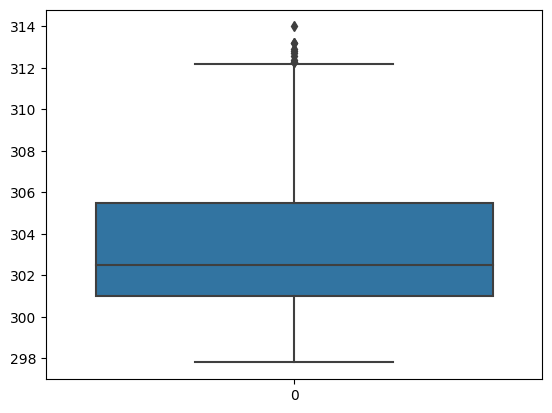

In [ ]:
sns.boxplot(df.reanalysis_max_air_temp_k)

<Axes: >

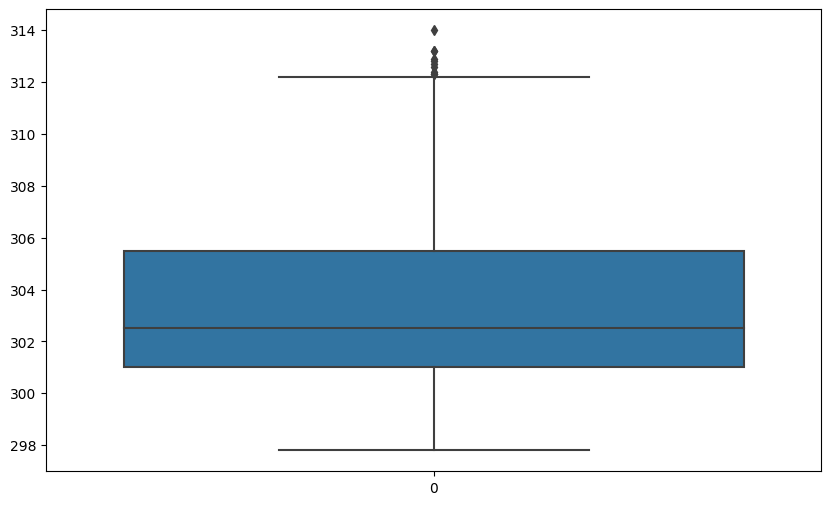

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(df.reanalysis_max_air_temp_k)

In [ ]:
df['reanalysis_max_air_temp_k'].median()

302.5

In [ ]:
df.corr()

<ipython-input-97-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
year,1.000000,-0.057618,0.223361,0.144345,0.234234,0.277759,0.202998,-0.136001,0.087200,0.135125,...,0.132209,0.335460,0.202998,0.163987,0.486436,0.052084,0.372310,0.232727,-0.209778,0.218978
weekofyear,-0.057618,1.000000,0.053548,0.048759,0.121557,0.068701,0.124566,0.425509,0.465395,0.352306,...,0.075352,-0.009552,0.124566,0.354942,0.088031,0.368812,0.027942,0.232674,0.290066,0.071998
ndvi_ne,0.223361,0.053548,1.000000,0.850902,0.614380,0.669504,0.205736,-0.340976,-0.037519,0.056077,...,0.199411,0.457985,0.205736,0.094852,0.673935,0.186227,0.658129,0.491922,-0.315696,0.242263
ndvi_nw,0.144345,0.048759,0.850902,1.000000,0.555809,0.651938,0.193563,-0.317862,-0.030916,0.063289,...,0.190989,0.449152,0.193563,0.100626,0.645596,0.203975,0.649483,0.490122,-0.304206,0.221314
ndvi_se,0.234234,0.121557,0.614380,0.555809,1.000000,0.820924,0.074633,-0.157447,0.051311,0.002810,...,0.034792,0.215606,0.074633,0.028795,0.486047,0.089242,0.449599,0.290691,-0.251621,0.131326
ndvi_sw,0.277759,0.068701,0.669504,0.651938,0.820924,1.000000,0.124047,-0.227824,0.022508,0.020746,...,0.101652,0.311759,0.124047,0.053437,0.569554,0.121060,0.545899,0.377393,-0.294684,0.158345
precipitation_amt_mm,0.202998,0.124566,0.205736,0.193563,0.074633,0.124047,1.000000,-0.015853,0.107043,0.434831,...,0.480434,0.499351,1.000000,0.451079,0.199675,0.226496,0.192617,0.297281,0.078357,0.487257
reanalysis_air_temp_k,-0.136001,0.425509,-0.340976,-0.317862,-0.157447,-0.227824,-0.015853,1.000000,0.901905,0.530775,...,-0.126986,-0.400601,-0.015853,0.509560,-0.279423,0.618397,-0.260367,0.225398,0.718754,-0.171544
reanalysis_avg_temp_k,0.087200,0.465395,-0.037519,-0.030916,0.051311,0.022508,0.107043,0.901905,1.000000,0.615212,...,-0.030440,-0.166657,0.107043,0.613486,0.124840,0.750674,0.108683,0.511304,0.579180,-0.045931
reanalysis_dew_point_temp_k,0.135125,0.352306,0.056077,0.063289,0.002810,0.020746,0.434831,0.530775,0.615212,1.000000,...,0.433277,0.554346,0.434831,0.997064,-0.033282,0.744311,0.037309,0.492388,0.652910,0.240799


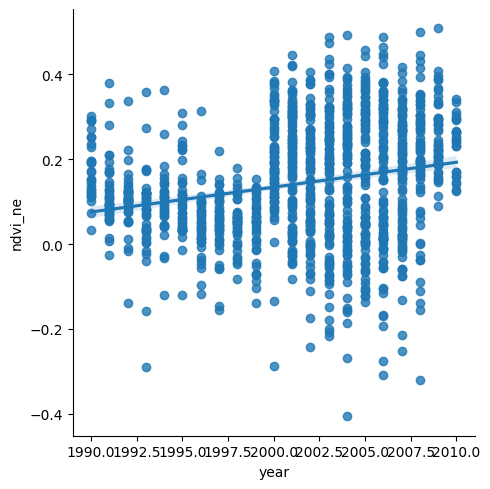

In [ ]:
#ns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='ndvi_ne',x='year',data=df)


In [ ]:
df['ndvi_ne'].mean()


0.1422935374167987

In [ ]:
df['ndvi_ne'].median()

0.12881665

<ipython-input-45-fadfb7dc1e6a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ndvi_ne'])


<Axes: xlabel='ndvi_ne', ylabel='Density'>

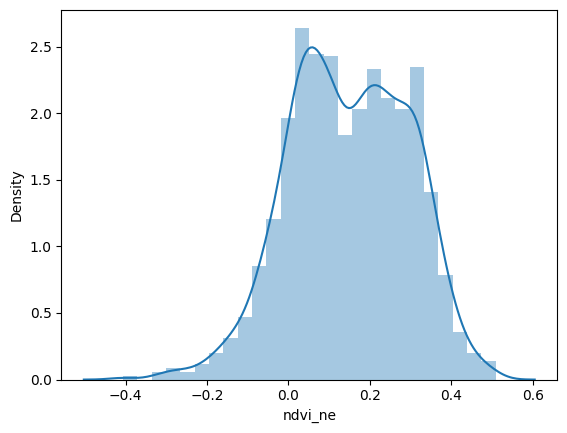

In [ ]:
sns.distplot(df['ndvi_ne'])

<ipython-input-46-c2234744b9c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ndvi_nw'])


<Axes: xlabel='ndvi_nw', ylabel='Density'>

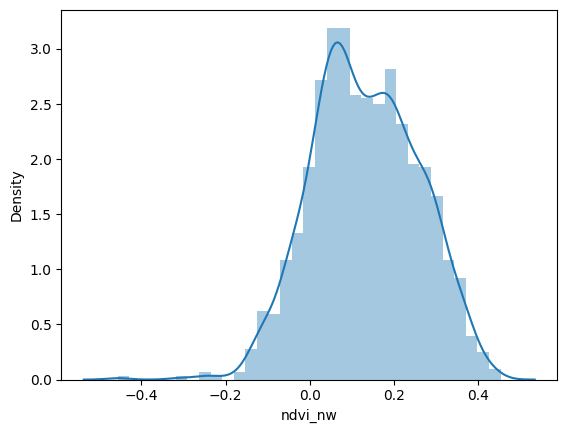

In [ ]:
sns.distplot(df['ndvi_nw'])

<ipython-input-47-9531ef08ba93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ndvi_se'])


<Axes: xlabel='ndvi_se', ylabel='Density'>

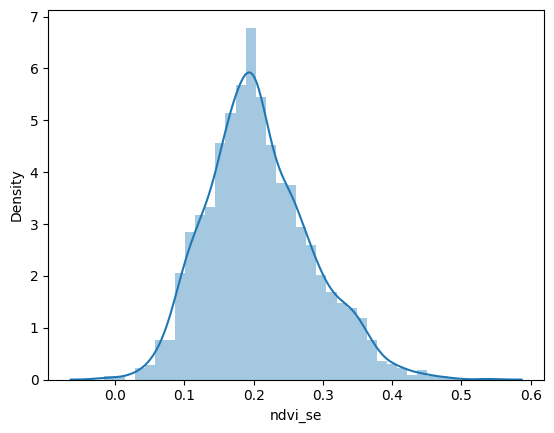

In [ ]:
sns.distplot(df['ndvi_se'])

<ipython-input-82-b7eb71460b55>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ndvi_sw'])


<Axes: xlabel='ndvi_sw', ylabel='Density'>

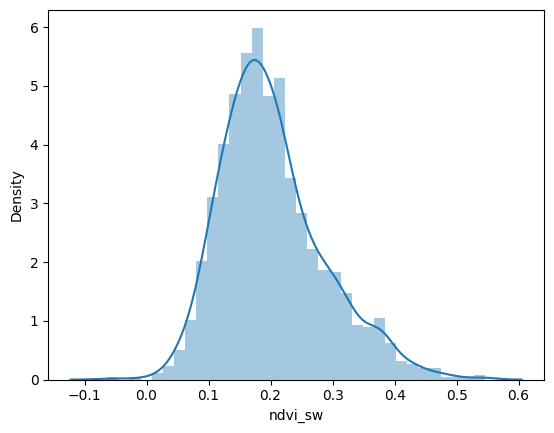

In [ ]:
sns.distplot(df['ndvi_sw'])

<ipython-input-84-d7b8f6638dd6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['precipitation_amt_mm'])


<Axes: xlabel='precipitation_amt_mm', ylabel='Density'>

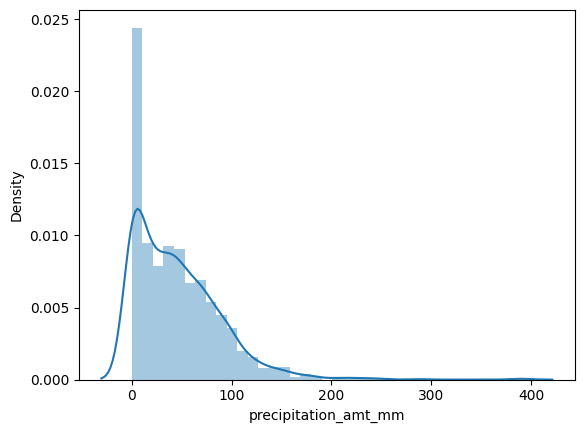

In [ ]:
sns.distplot(df['precipitation_amt_mm'])

<ipython-input-85-b7d7a3352f8a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reanalysis_air_temp_k'])


<Axes: xlabel='reanalysis_air_temp_k', ylabel='Density'>

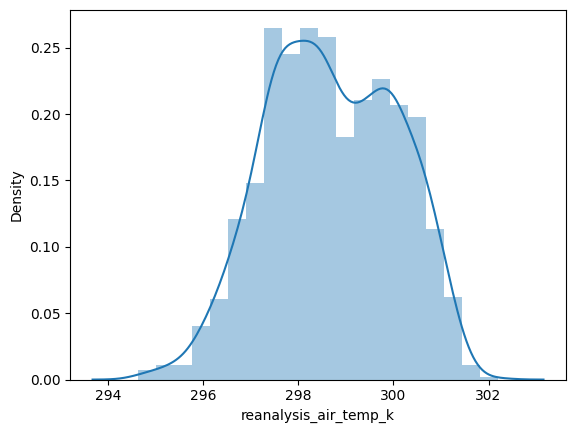

In [ ]:
sns.distplot(df['reanalysis_air_temp_k'])

<ipython-input-86-4ec95db13f44>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reanalysis_avg_temp_k'])


<Axes: xlabel='reanalysis_avg_temp_k', ylabel='Density'>

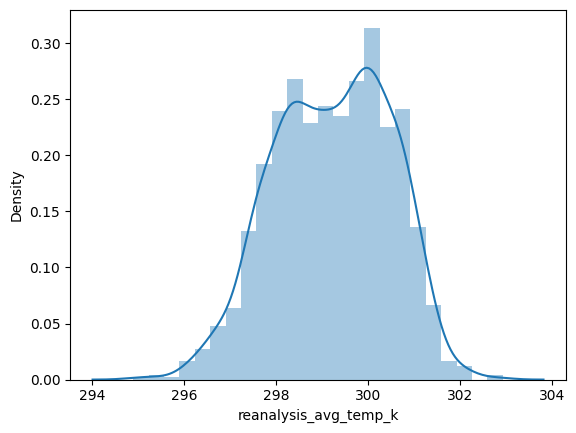

In [ ]:
sns.distplot(df['reanalysis_avg_temp_k'])

<ipython-input-88-c33e252ab433>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reanalysis_dew_point_temp_k'])


<Axes: xlabel='reanalysis_dew_point_temp_k', ylabel='Density'>

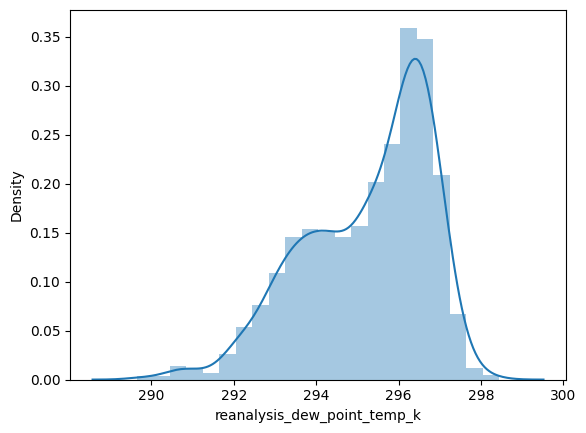

In [ ]:
sns.distplot(df['reanalysis_dew_point_temp_k'])

<ipython-input-90-35cde10cca66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reanalysis_max_air_temp_k'])


<Axes: xlabel='reanalysis_max_air_temp_k', ylabel='Density'>

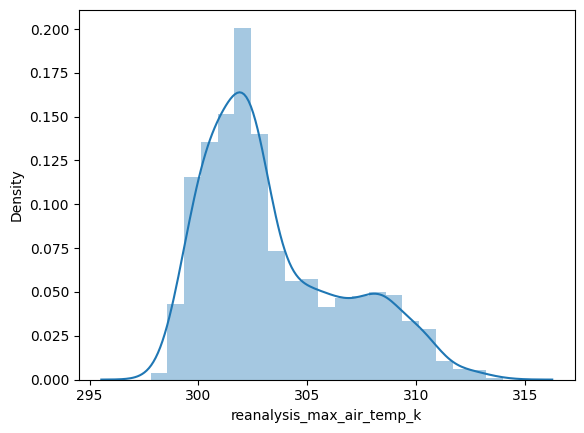

In [ ]:
sns.distplot(df['reanalysis_max_air_temp_k'])

<ipython-input-92-44f4a46155ec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reanalysis_min_air_temp_k'])


<Axes: xlabel='reanalysis_min_air_temp_k', ylabel='Density'>

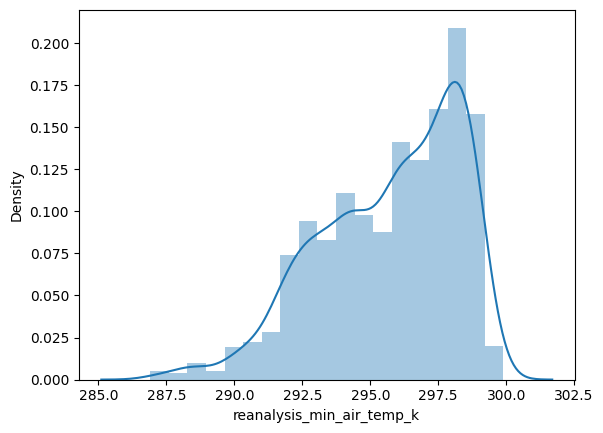

In [ ]:
sns.distplot(df['reanalysis_min_air_temp_k'])

<ipython-input-94-04bbac9f8343>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reanalysis_precip_amt_kg_per_m2'])


<Axes: xlabel='reanalysis_precip_amt_kg_per_m2', ylabel='Density'>

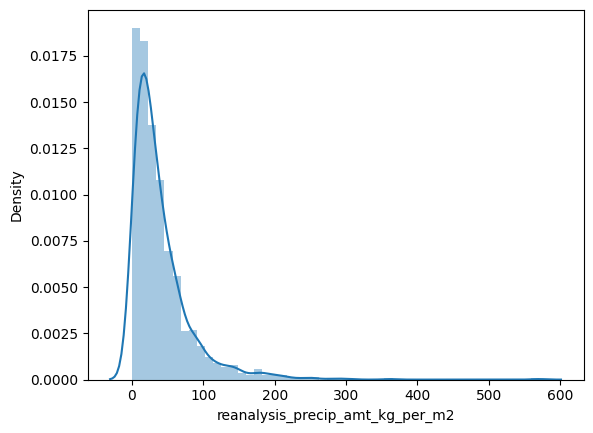

In [ ]:
sns.distplot(df['reanalysis_precip_amt_kg_per_m2'])

<ipython-input-95-c70df789c24c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reanalysis_relative_humidity_percent'])


<Axes: xlabel='reanalysis_relative_humidity_percent', ylabel='Density'>

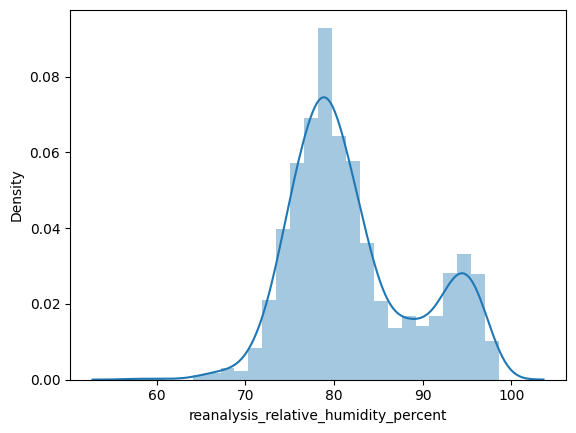

In [ ]:
sns.distplot(df['reanalysis_relative_humidity_percent'])

<ipython-input-97-c44bdc247e59>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reanalysis_sat_precip_amt_mm'])


<Axes: xlabel='reanalysis_sat_precip_amt_mm', ylabel='Density'>

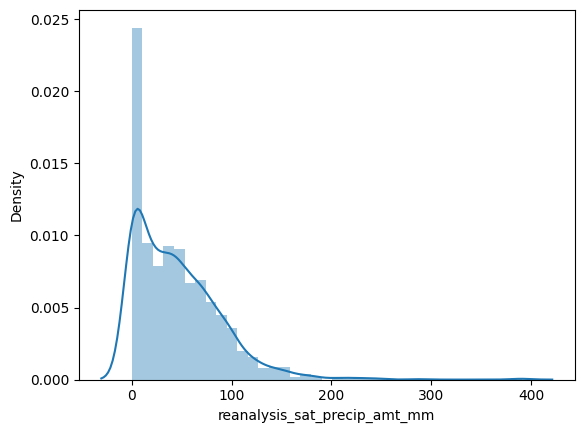

In [ ]:
sns.distplot(df['reanalysis_sat_precip_amt_mm'])

<ipython-input-99-5d278e683c26>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reanalysis_specific_humidity_g_per_kg'])


<Axes: xlabel='reanalysis_specific_humidity_g_per_kg', ylabel='Density'>

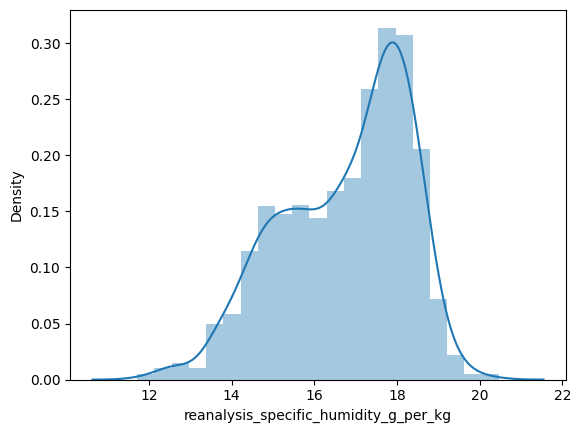

In [ ]:
sns.distplot(df['reanalysis_specific_humidity_g_per_kg'])

<ipython-input-100-a2406b24266d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reanalysis_tdtr_k'])


<Axes: xlabel='reanalysis_tdtr_k', ylabel='Density'>

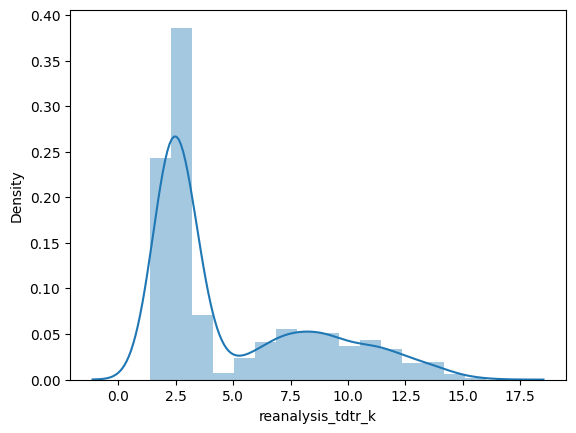

In [ ]:
sns.distplot(df['reanalysis_tdtr_k'])

In [142]:
df['reanalysis_tdtr_k'].mean()

4.932820153953625

In [143]:
df['reanalysis_tdtr_k'].median()

2.87142857143

<ipython-input-101-aec70c881749>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['station_avg_temp_c'])


<Axes: xlabel='station_avg_temp_c', ylabel='Density'>

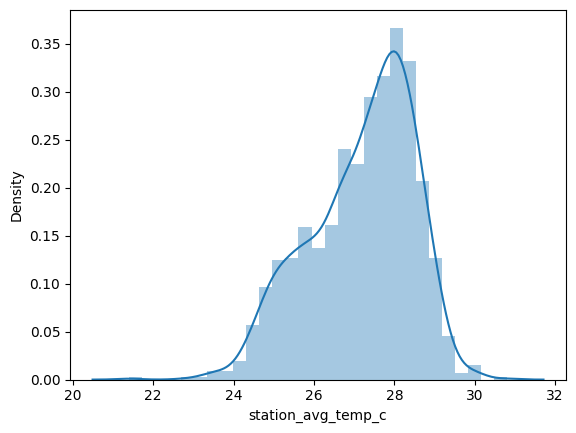

In [ ]:
sns.distplot(df['station_avg_temp_c'])

<ipython-input-102-d12998624337>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['station_diur_temp_rng_c'])


<Axes: xlabel='station_diur_temp_rng_c', ylabel='Density'>

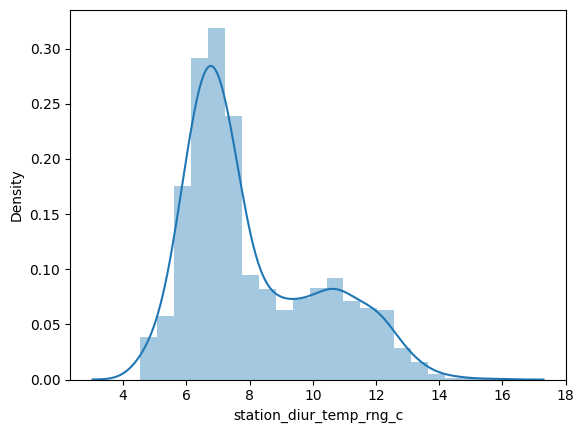

In [ ]:
sns.distplot(df['station_diur_temp_rng_c'])

<ipython-input-103-1238e187b178>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['station_max_temp_c'])


<Axes: xlabel='station_max_temp_c', ylabel='Density'>

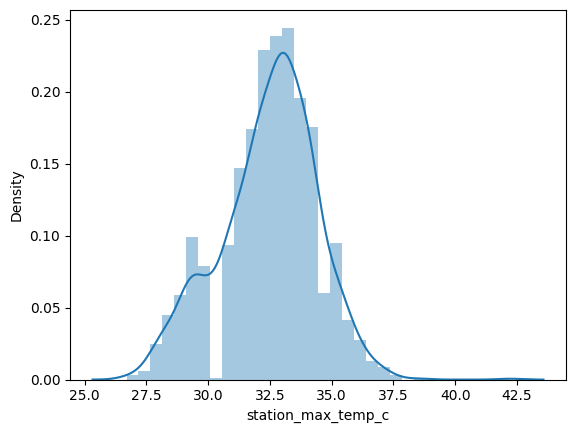

In [ ]:
sns.distplot(df['station_max_temp_c'])

<ipython-input-104-ec8199809a8b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['station_min_temp_c'])


<Axes: xlabel='station_min_temp_c', ylabel='Density'>

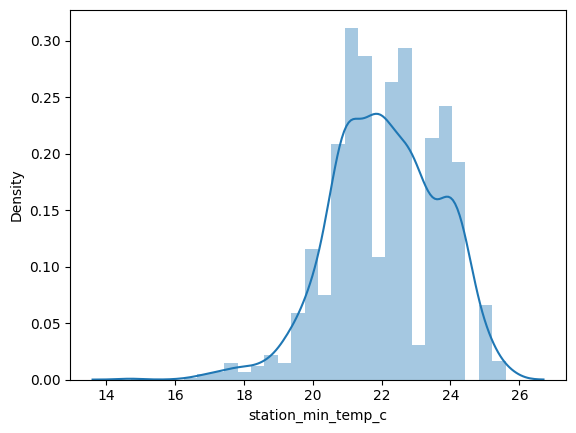

In [ ]:
sns.distplot(df['station_min_temp_c'])

<ipython-input-106-d9c15878c782>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['station_precip_mm'])


<Axes: xlabel='station_precip_mm', ylabel='Density'>

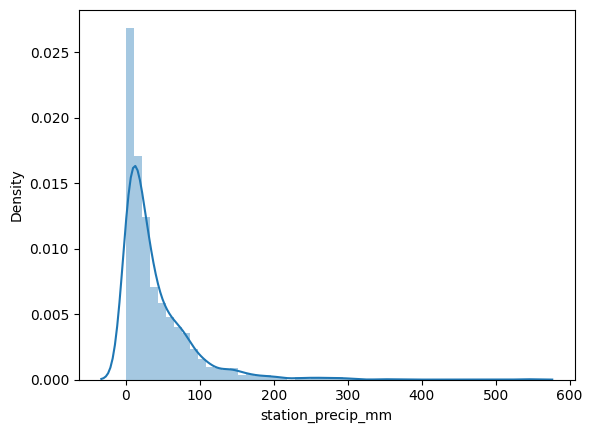

In [ ]:
sns.distplot(df['station_precip_mm'])

<ipython-input-107-765f0dd4b131>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_cases'])


<Axes: xlabel='total_cases', ylabel='Density'>

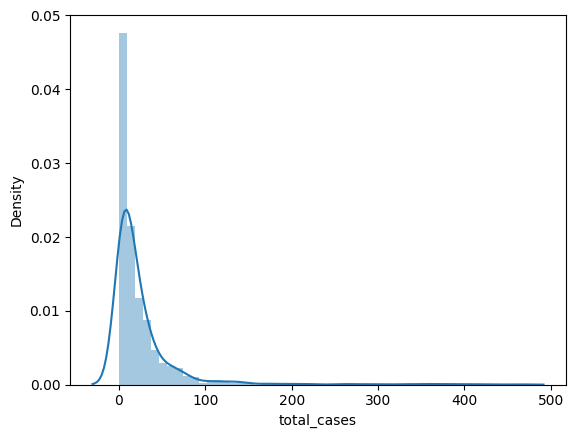

In [ ]:
sns.distplot(df['total_cases'])